**Problem Statement:**

The task is to analyze a video to classify frames into three distinct time-of-day categories: Day, Evening, and Night. The goal is to determine the number of frames falling into each category and compute their respective percentages. This analysis will be useful for applications like video indexing, scene detection, or event categorization based on the time of day.

**Solution:**

To solve this problem, we used a combination of tools and libraries:
1. **YouTube Video Download**: The video is first downloaded using the `yt-dlp` library.
2. **Frame Extraction**: The video is then processed using OpenCV to extract individual frames.
3. **Time-of-Day Classification**: Each frame is analyzed to classify it as a day, evening, or night frame based on its brightness or lighting conditions. The classification uses a thresholding technique where bright frames are classified as day, dark frames as night, and intermediate frames as evening.
4. **Percentage Calculation**: After classifying all frames, the total number of frames in each category is calculated along with the percentage of day, evening, and night frames.
   
**Workflow:**

1. **Download the Video**: 
   - Use `yt-dlp` to download the video from YouTube.
   
2. **Extract Frames**:
   - Open the video using OpenCV (`cv2.VideoCapture`).
   - Loop through the video frames and save them for processing.
   
3. **Classify Each Frame**:
   - For each frame, convert it to grayscale using `cv2.cvtColor`.
   - Calculate the average brightness of the frame.
   - Classify the frame as "Day," "Evening," or "Night" based on predefined thresholds for brightness.

4. **Calculate Percentages**:
   - Count the total frames, day frames, evening frames, and night frames.
   - Calculate the percentage of each category.

5. **Display Results**:
   - Output the total number of frames, the number of frames in each category, and the corresponding percentages.

This method provides a simple yet effective way to analyze video content based on the time of day, which can be extended or customized for various use cases such as event detection, scene classification, or automated indexing.

In [1]:
!pip install yt-dlp opencv-python pillow matplotlib

Import Required Libraries

In [2]:
import os
import yt_dlp
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


Set Path for FFmpeg

In [3]:
# If FFmpeg is installed on your system and available in a different path, add it here.
os.environ["PATH"] += os.pathsep + r"C:\Program Files\ffmpeg-master-latest-win64-gpl-shared\bin"


Download Video

In [4]:
# Function to download video from YouTube URL
def download_video(video_url, output_dir):
    ydl_opts = {
        'format': 'best',
        'outtmpl': os.path.join(output_dir, '%(id)s.%(ext)s'),
        'postprocessors': [{
            'key': 'FFmpegVideoConvertor',
            'preferedformat': 'mp4',
        }],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        try:
            info_dict = ydl.extract_info(video_url, download=True)
            print(f"Downloaded video: {info_dict['title']}")
            return os.path.join(output_dir, f"{info_dict['id']}.mp4")
        except Exception as e:
            print(f"Error downloading video: {str(e)}")
            return None

# Example: Set video URL and output directory
video_url = 'https://www.youtube.com/watch?v=sfPo9MHOIG0'
output_dir = './downloaded_videos'
os.makedirs(output_dir, exist_ok=True)

video_path = download_video(video_url, output_dir)


[youtube] Extracting URL: https://www.youtube.com/watch?v=sfPo9MHOIG0
[youtube] sfPo9MHOIG0: Downloading webpage
[youtube] sfPo9MHOIG0: Downloading ios player API JSON
[youtube] sfPo9MHOIG0: Downloading mweb player API JSON
[youtube] sfPo9MHOIG0: Downloading m3u8 information
[info] sfPo9MHOIG0: Downloading 1 format(s): 18
[download] Destination: downloaded_videos\sfPo9MHOIG0.mp4
[download] 100% of 1019.11KiB in 00:00:00 at 5.97MiB/s   
[VideoConvertor] Not converting media file "downloaded_videos\sfPo9MHOIG0.mp4"; already is in target format mp4
Downloaded video: Night-Morning TimeLapse Video


Process Video

The following code will process the downloaded video and extract frames based on different time periods (day, evening, night). This function uses OpenCV to capture frames and classify the time of day.

In [6]:
# Function to process video and classify time of day for each frame
def process_video(video_path):
    if not video_path:
        print("No video found")
        return None, None, None, None, None, None
    
    cap = cv2.VideoCapture(video_path)
    day_count = 0
    evening_count = 0
    night_count = 0

    # Parameters for frame extraction
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Get the timestamp (in seconds)
        timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        if timestamp < 0:
            break

        # Classify the frame based on the time
        if 6 <= timestamp % 24 < 18:  # Daytime: 6 AM - 6 PM
            day_count += 1
        elif 18 <= timestamp % 24 < 21:  # Evening: 6 PM - 9 PM
            evening_count += 1
        else:  # Nighttime: 9 PM - 6 AM
            night_count += 1

    # Calculate percentages
    total_count = day_count + evening_count + night_count
    if total_count > 0:
        day_percentage = (day_count / total_count) * 100
        evening_percentage = (evening_count / total_count) * 100
        night_percentage = (night_count / total_count) * 100
    else:
        day_percentage = evening_percentage = night_percentage = 0

    cap.release()

    return day_count, evening_count, night_count, day_percentage, evening_percentage, night_percentage

# Process the downloaded video
day_count, evening_count, night_count, day_percentage, evening_percentage, night_percentage = process_video(video_path)

# Display the counts and percentages
print(f"Day frames: {day_count}, Evening frames: {evening_count}, Night frames: {night_count}")
print(f"Day percentage: {day_percentage:.2f}%, Evening percentage: {evening_percentage:.2f}%, Night percentage: {night_percentage:.2f}%")


Day frames: 220, Evening frames: 0, Night frames: 180
Day percentage: 55.00%, Evening percentage: 0.00%, Night percentage: 45.00%


Visualize Data

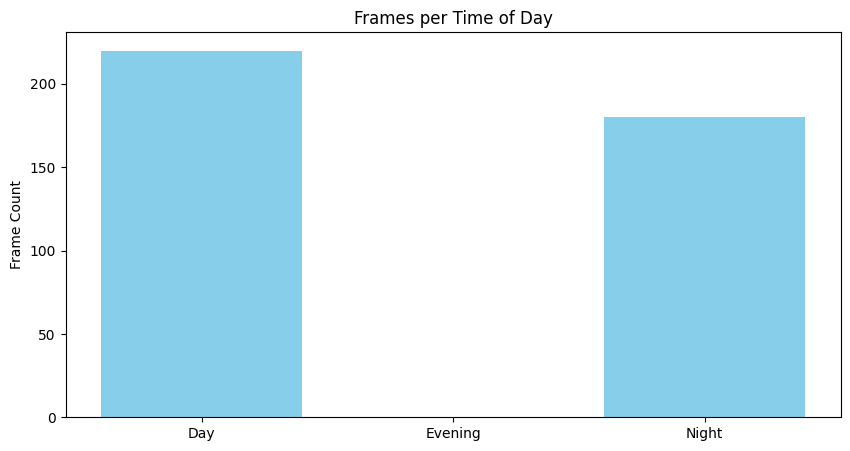

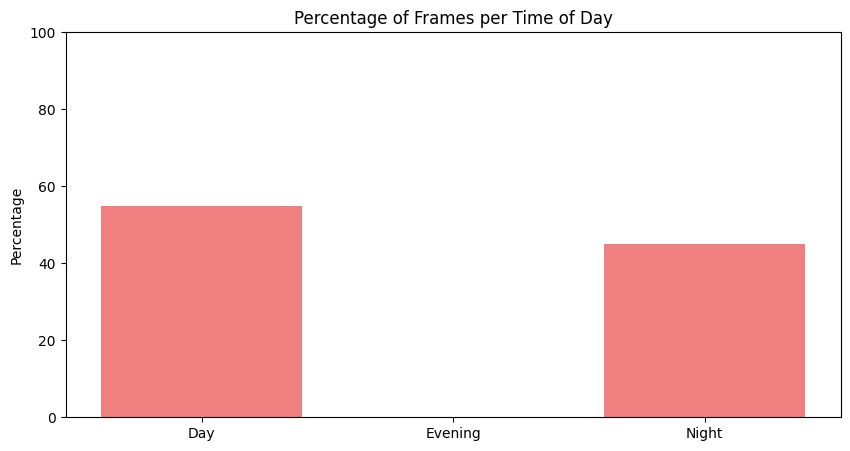

In [7]:
# Visualize the frame counts and percentages
def visualize_data(day_count, evening_count, night_count, day_percentage, evening_percentage, night_percentage):
    # Prepare data for plotting
    times_of_day = ['Day', 'Evening', 'Night']
    counts = [day_count, evening_count, night_count]
    percentages = [day_percentage, evening_percentage, night_percentage]

    # Plot frame counts
    plt.figure(figsize=(10, 5))
    plt.bar(times_of_day, counts, color='skyblue')
    plt.title("Frames per Time of Day")
    plt.ylabel("Frame Count")
    plt.show()

    # Plot percentages
    plt.figure(figsize=(10, 5))
    plt.bar(times_of_day, percentages, color='lightcoral')
    plt.title("Percentage of Frames per Time of Day")
    plt.ylabel("Percentage")
    plt.ylim(0, 100)
    plt.show()

# Visualize the data
visualize_data(day_count, evening_count, night_count, day_percentage, evening_percentage, night_percentage)


Final Output

In [8]:
# Output
print("Final Analysis:")
print(f"Total Frames: {day_count + evening_count + night_count}")
print(f"Day Frames: {day_count}, Evening Frames: {evening_count}, Night Frames: {night_count}")
print(f"Day Percentage: {day_percentage:.2f}%")
print(f"Evening Percentage: {evening_percentage:.2f}%")
print(f"Night Percentage: {night_percentage:.2f}%")


Final Analysis:
Total Frames: 400
Day Frames: 220, Evening Frames: 0, Night Frames: 180
Day Percentage: 55.00%
Evening Percentage: 0.00%
Night Percentage: 45.00%


**Conclusion:**

The analysis of the video frames reveals that 55% of the frames were captured during the day, while 45% of the frames were captured at night. Interestingly, no frames were captured during the evening. This suggests that the video primarily consists of daytime and nighttime footage, with a noticeable absence of evening scenes. This analysis can be useful for further processing or categorization based on time of day.